# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Trees are constructed by taking data and proposing a feature and then splitting the data by true/false. This pattern continues and while adjusting the "feature" until the data is classfied.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships well because it uses thresholds rather than assuming a linear pattern. It handles high dimensional data and arbitrariness much better than linear models do.

3. Why is the Gini a good loss function for categorical target variables?

Gini is a good way to assess the purity of a node. This is a good loss function for catergorical target variables because rather than having a mathematical equation that measures the actual variables, we can look at how confident we are that the node we've split off can be classified further or not.  

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees tend to overfit because it's easy to continue thresholding the data so that it is all correctly sorted. To prevent this tendency, we can add depth constraints so there can only be a certain number of levels of nodes. We can also impose a lower bound of the impurity so that the nodes can't be "too" pure which often indicates overfitting.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

False. Trees do perform well with situations with a lot of categorical variables but they can also perform well with numeric data and they can also do okay with just a couple categorical variables.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

It is discourages for decision trees to split of into more than two nodes because this causes the model to be less stable and it's also not necessary. The decision tree can account for data that we might intuitively think needs to be split into 3+ groups later on with another binary decision.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

The depth of a tree is a heuristic way to determine if a tree is under or over fitted and also the gini can be indicator if it is oddly high or low.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [174]:
import pandas as pd
import numpy as np


In [175]:
cars = pd.read_csv("cars_hw.csv")

In [176]:
cars.shape

(976, 12)

In [177]:
cars.columns

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')

In [178]:
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target = 'Price'

In [179]:
cars_encoded = pd.get_dummies(cars[categorical_vars], drop_first=True)

In [180]:
X = pd.concat([cars[numeric_vars], cars_encoded], axis=1)
y = cars[target]

In [181]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

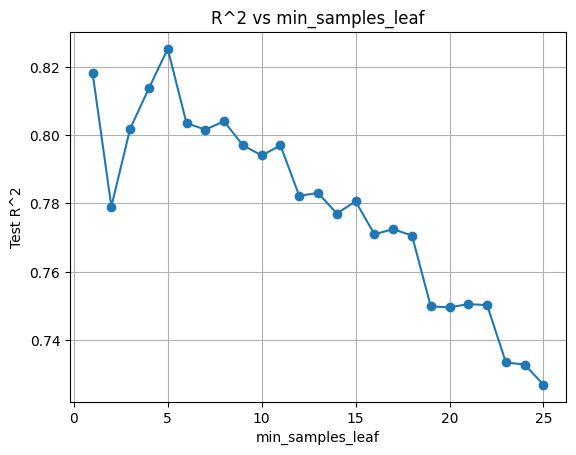

Best min_samples_leaf: 5 R^2: 0.8253410511223336


In [182]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

r2_scores = []
leaf_range = range(1, 26)

for min_leaf in leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


plt.plot(leaf_range, r2_scores, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Test R^2")
plt.title("R^2 vs min_samples_leaf")
plt.grid(True)
plt.show()

print(f"Best min_samples_leaf: 5 R^2: {max(r2_scores)}")

In [183]:
model3 = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

r2 = r2_score(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Test R^2: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f}")

Test R^2: 0.8019
Test RMSE: 150732.29


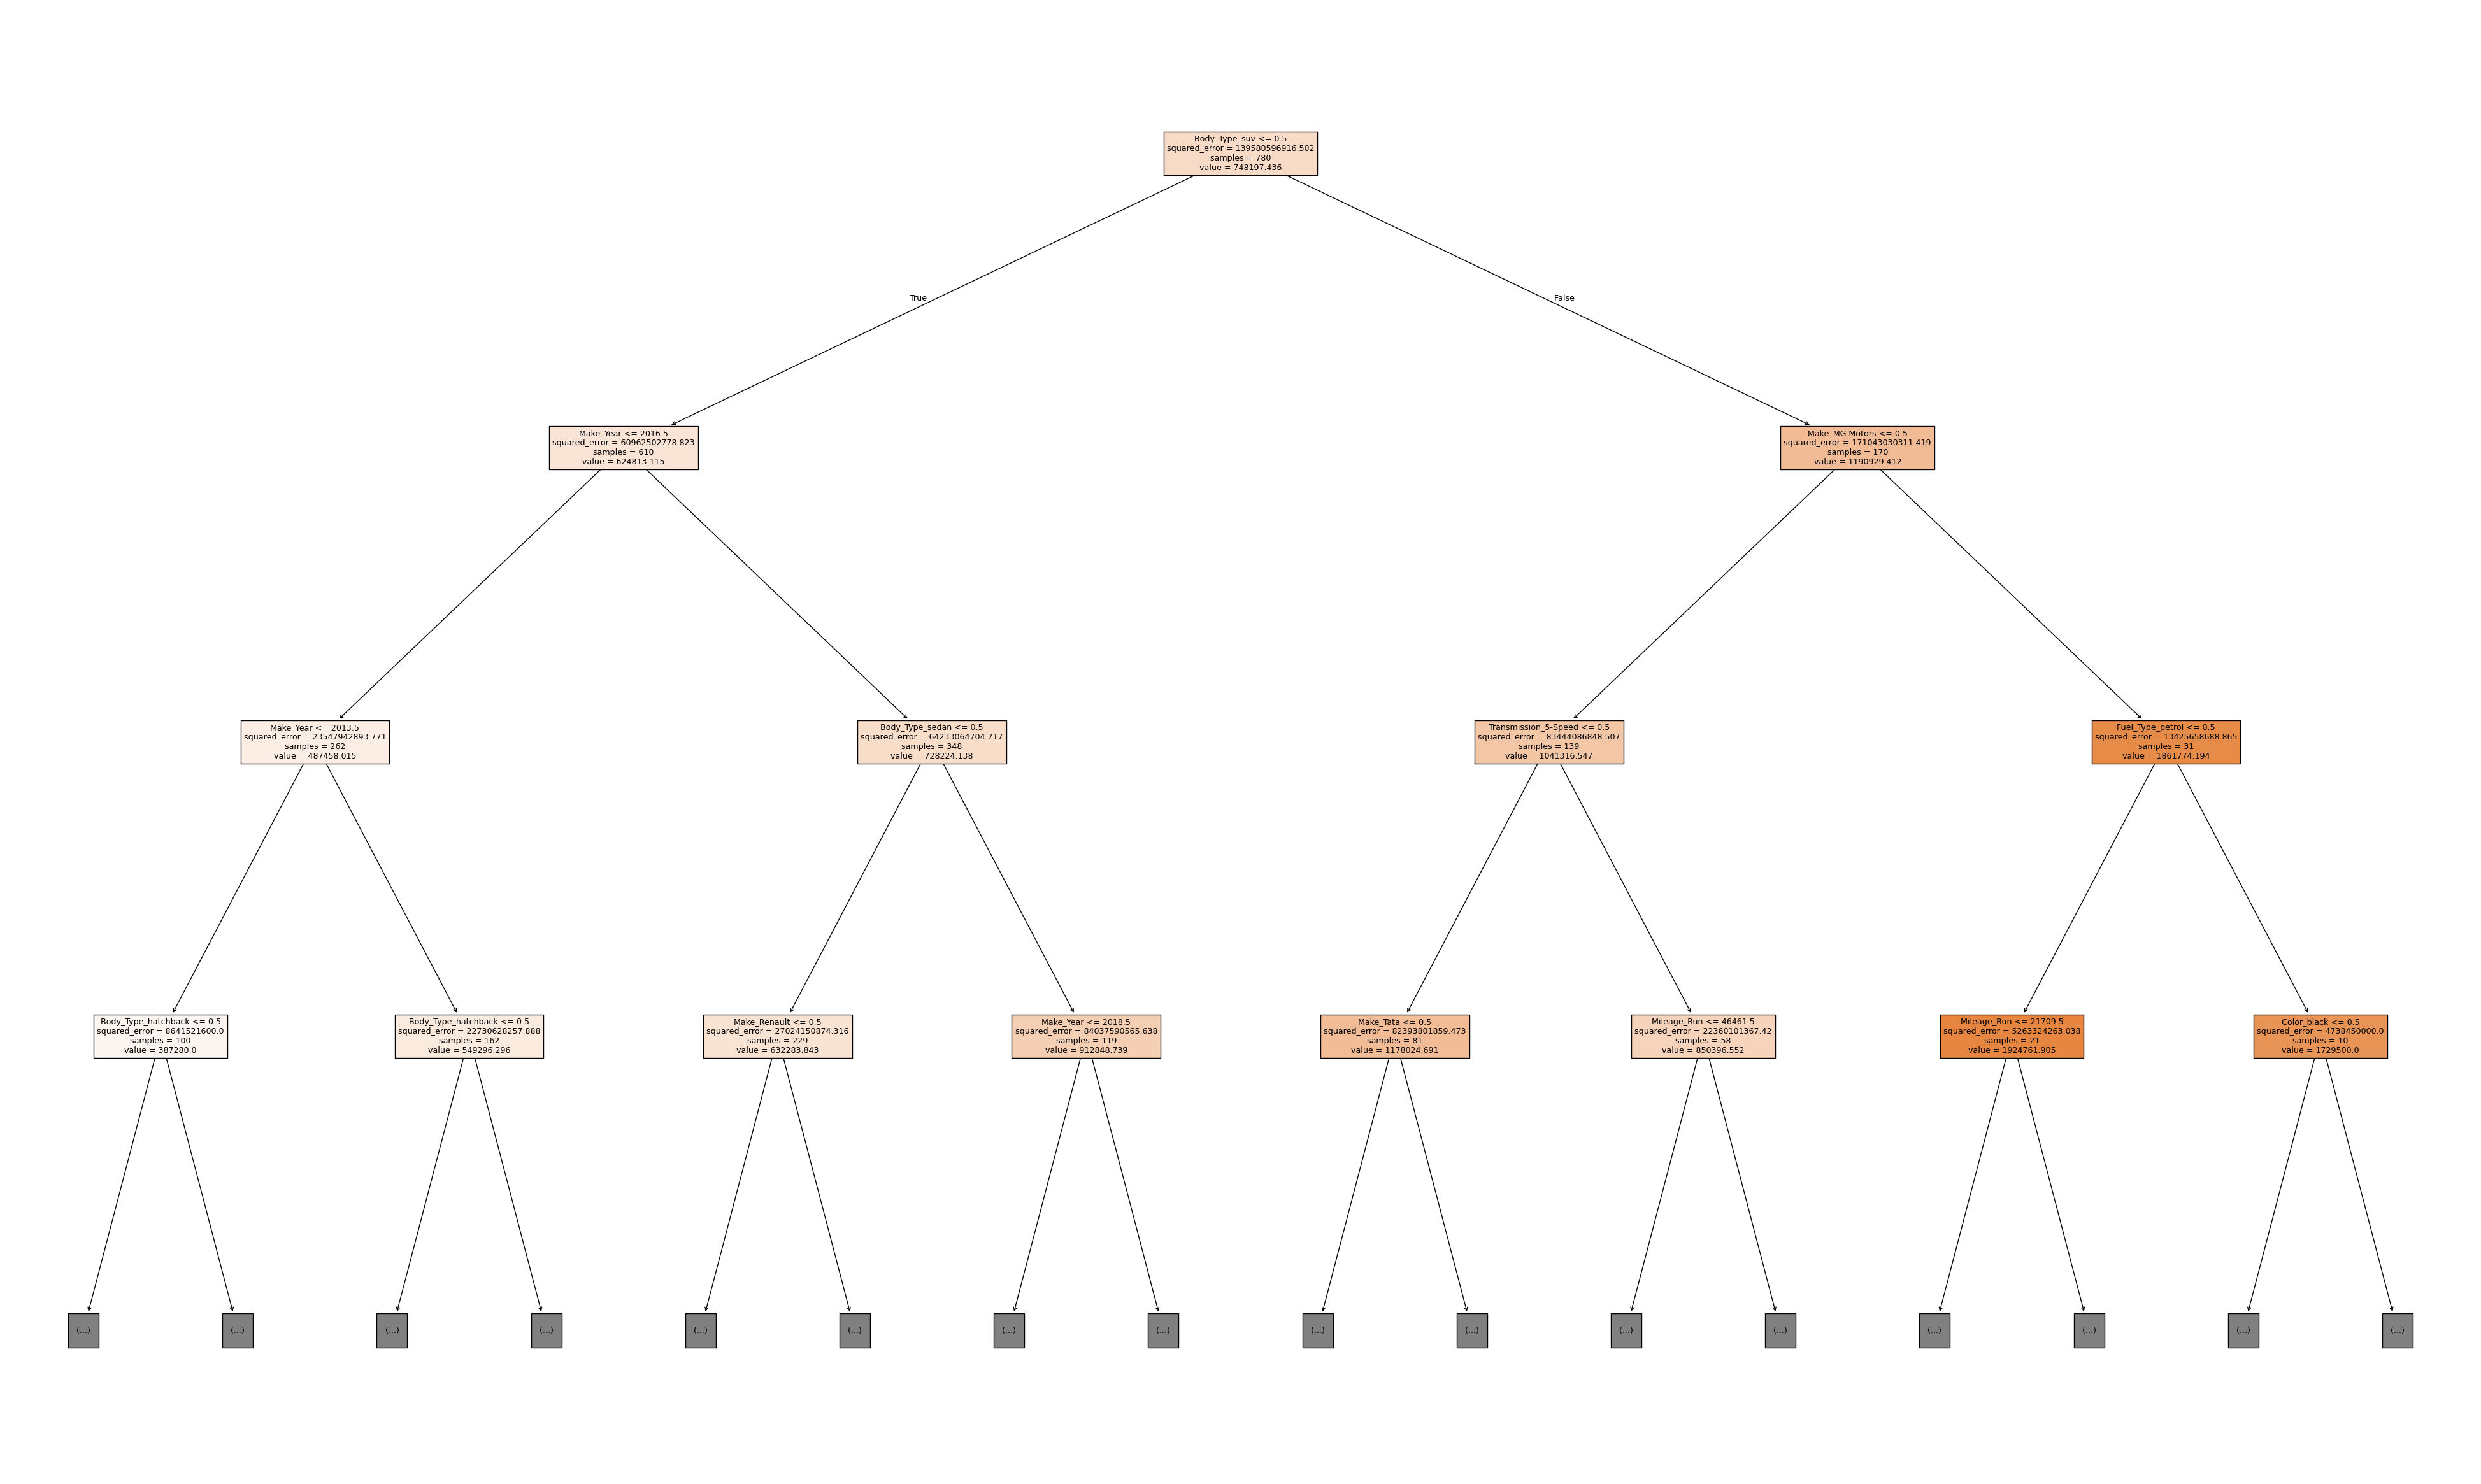

In [184]:
plt.figure(figsize=(50, 30))
plot_tree(model3, feature_names=X.columns, filled=True, max_depth=3)

plt.show()

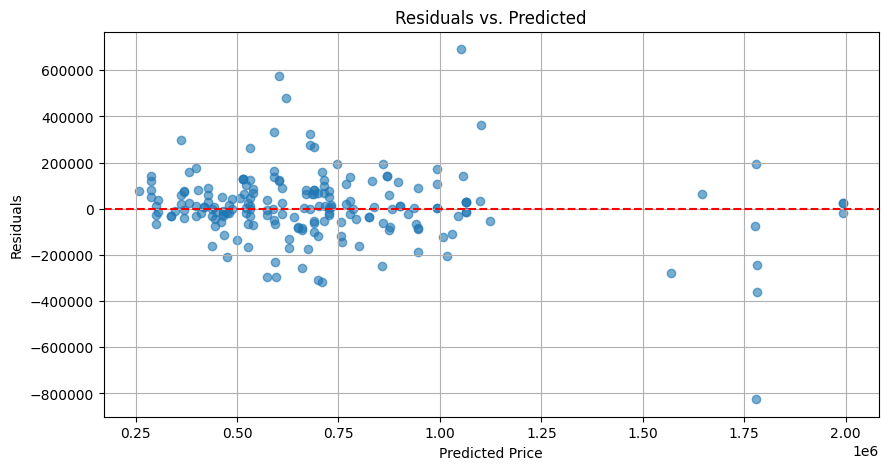

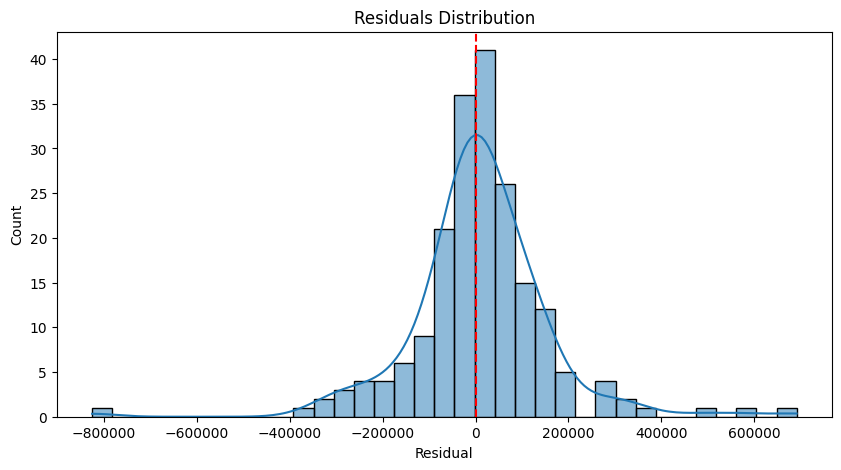

In [185]:
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()

In [186]:
#yes symmetric and centered around 0

In [187]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
linreg.fit(X_train, y_train)


y_pred_lr = linreg.predict(X_test)


r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


print(f"Decision Tree - R^2: {r2:.4f}, RMSE: {rmse:.2f}")
print(f"Linear Regression - R^2: {r2_lr:.4f}, RMSE: {rmse_lr:.2f}")

Decision Tree - R^2: 0.8019, RMSE: 150732.29
Linear Regression - R^2: 0.8203, RMSE: 143575.20


In [188]:
#the linear model did better but i may have done the dt wrong then because the data
#should be using a lot of features and not necessarily follow a linear pattern

#although w the depth of 5 the r^2 for the dt was better than the lin model

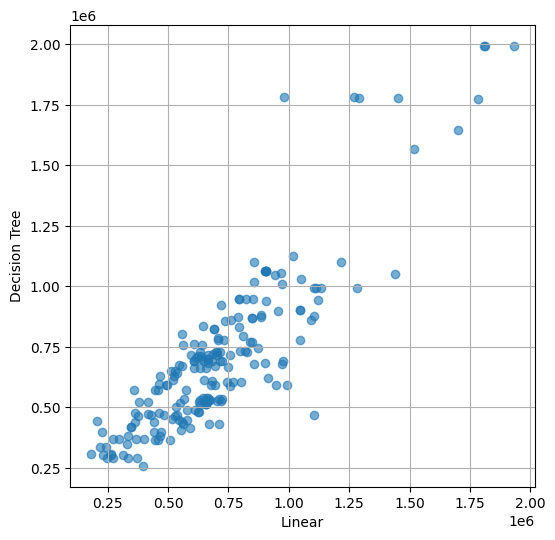

In [189]:
tree_preds = model3.predict(X_test)
lin_preds = linreg.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(lin_preds, tree_preds, alpha=0.6)

plt.xlabel("Linear")
plt.ylabel("Decision Tree")

plt.grid(True)
plt.show()

In [190]:
#it looks pretty linear so I think they were actually performing similarly

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [191]:
bc = pd.read_csv("Breast Cancer METABRIC.csv")

In [192]:
bc.shape

(2509, 34)

In [193]:
bc.head()

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [194]:
bc= bc.dropna()

In [195]:
numeric_vars = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_vars = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']
target = 'Overall Survival Status'

bc_encoded = pd.get_dummies(bc[categorical_vars], drop_first=True)

In [196]:
X = pd.concat([bc[numeric_vars], bc_encoded], axis=1)

In [197]:
y = bc[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

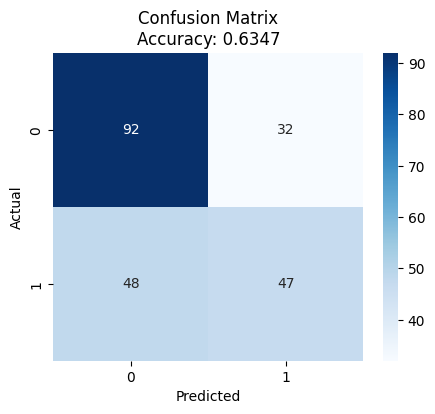

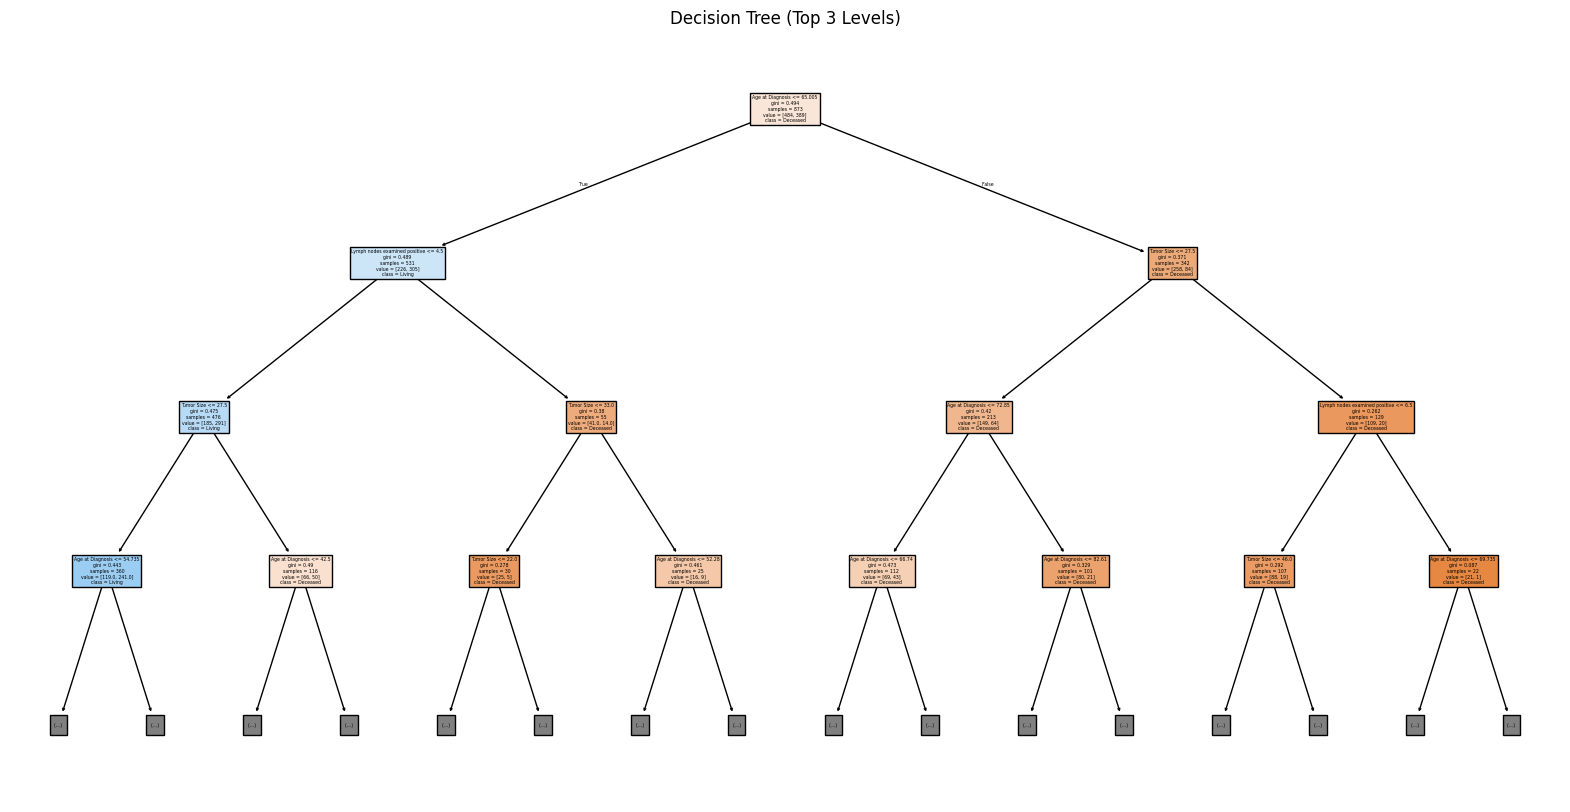

In [199]:
from sklearn.metrics import confusion_matrix, accuracy_score


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix\nAccuracy: {acc:.4f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot dendrogram (small tree only)
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True, max_depth=3)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()

In [ ]:
#accuracy is 0.63
#tpr is 0.657
#fpr is 0.595

#tpr is slightly better

In [205]:
bc = bc.dropna(subset=['Overall Survival (Months)'])
X = pd.concat([bc[numeric_vars], pd.get_dummies(bc[categorical_vars], drop_first=True)], axis=1)
y = bc['Overall Survival (Months)']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.dropna(), y.loc[X.dropna().index], test_size=0.2, random_state=42)

r2_scores = []
leaf_range = range(1, 111)

for min_leaf in leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=min_leaf, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores.append(r2_score(y_test, y_pred))

best_leaf = leaf_range[np.argmax(r2_scores)]
best_r2 = max(r2_scores)

print(f"Best min_samples_leaf: {best_leaf}, R^2: {best_r2:.4f}")

Best min_samples_leaf: 52, R^2: 0.1501


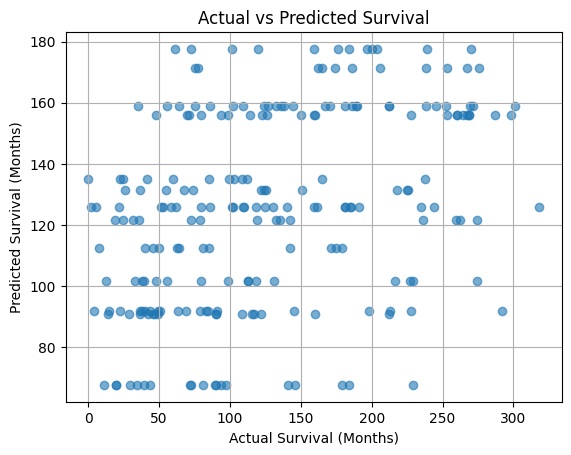

In [209]:
best_model = DecisionTreeRegressor(min_samples_leaf=52, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)

plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Actual vs Predicted Survival")
plt.grid(True)
plt.show()

In [ ]:
#i would NOT use this for clinical trials, it's not very accurate at all (unless i messed it up)

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?